In [1]:
path = "../COVID-19/csse_covid_19_data/csse_covid_19_time_series/"

In [2]:
d1 = "time_series_covid19_confirmed_global.csv"
d2 = "time_series_covid19_deaths_global.csv"
d3 = "time_series_covid19_recovered_global.csv"




In [3]:
import pandas as pd

In [4]:
dd1 = pd.read_csv(path+d1)

In [5]:
dd1.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
3/27/20             int64
3/28/20             int64
3/29/20             int64
3/30/20             int64
3/31/20             int64
Length: 74, dtype: object

In [6]:
country = []
for i in dd1['Country/Region'].drop_duplicates():
    country.append(i)
    
dateparse = lambda x: pd.datetime.strptime(x, '%m/%d/%y')


In [7]:
df_0 = dd1.loc[lambda df: df['Country/Region'] == country[0]]
df_0.loc[country[0], :] = df_0.sum()
data = df_0.T[4:]
#data['date'] = [ dateparse(i) for i in data.index ]
data['day'] = [ i for i,ii in enumerate(data.index) ]


for i in country[1:]:    
    df_1 = dd1.loc[lambda df: df['Country/Region'] == i]
    df_1.loc[i, :] = df_1.sum()

    data1 = df_1.T[4:]
    #data1['date'] = [ dateparse(j) for j in data1.index ]
    data1['day'] = [ i for i,ii in enumerate(data1.index) ]
    
    data = data.merge(data1, how='outer', on='day')




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [8]:
df = data[country[:]+['day']]

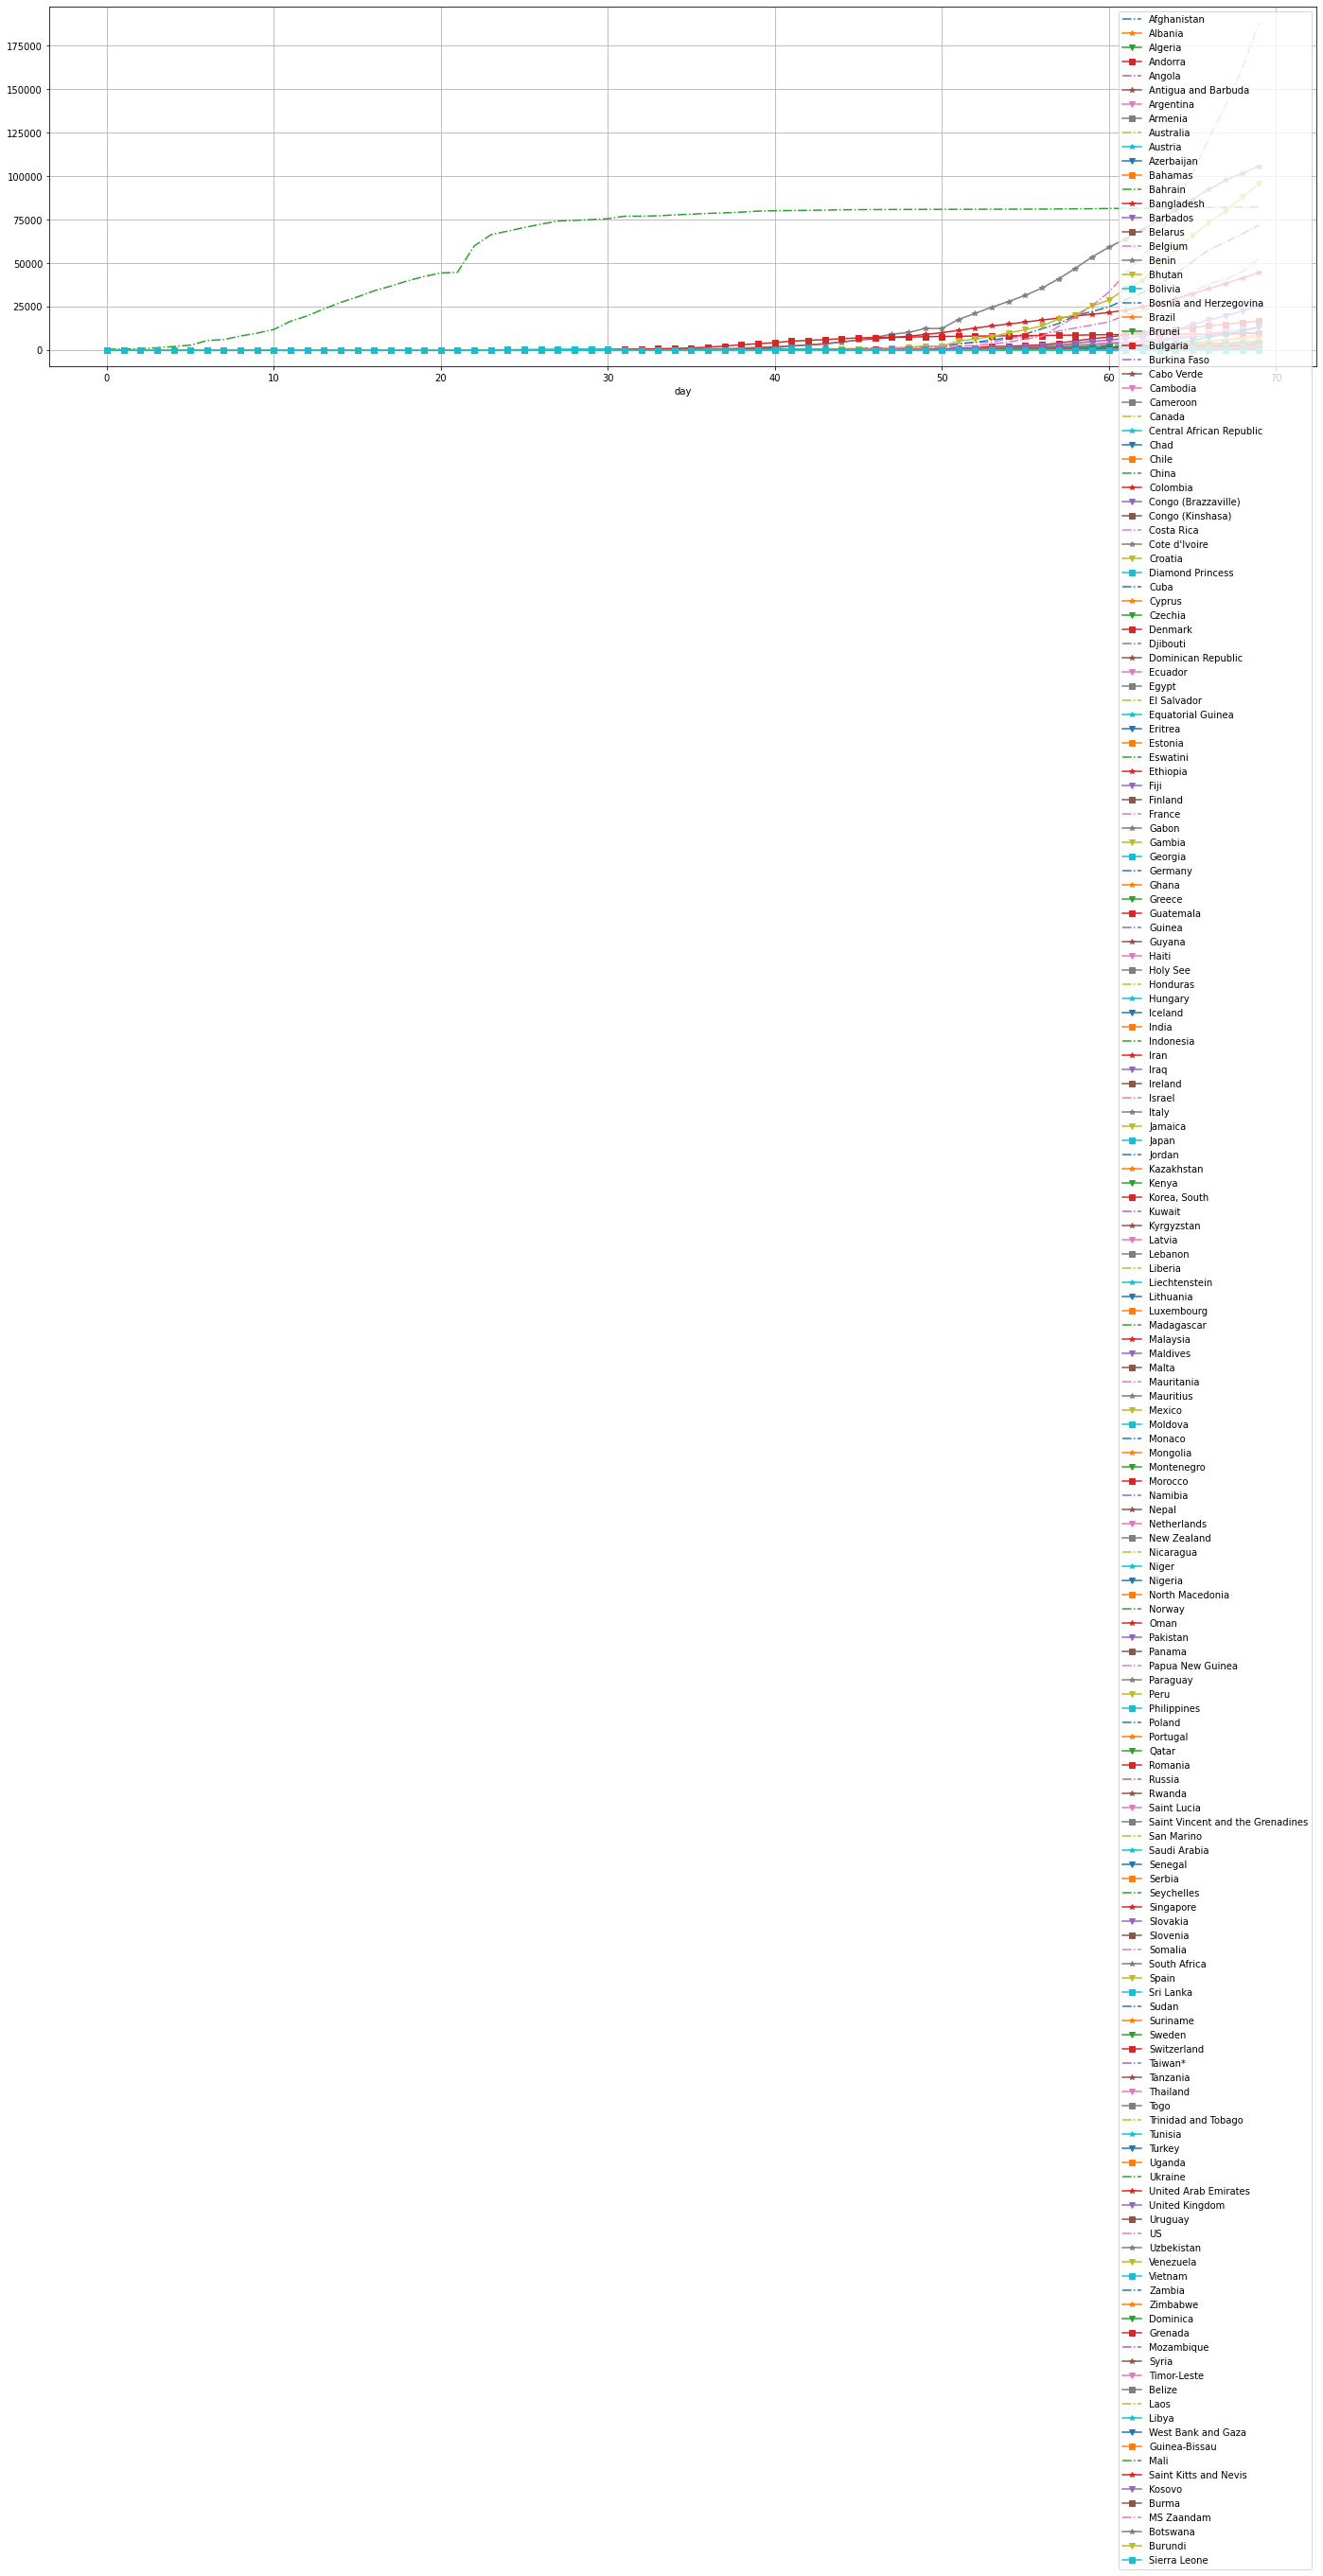

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams["figure.facecolor"] = "w"


fig, ax = plt.subplots(figsize=(24, 7))
maker = ["-.",'-*','-v','-s']

for i,ii in enumerate(country):
    df.plot(ax=ax, x="day",y=ii, style=maker[i%4])

#ax.get_legend().remove()
ax.grid(True)

